# Clustring :K_means :Data Segmentaion
- Data Segmentation :Clustring of Variable with Meaning full Information

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

os.chdir("C:\\Users\\Home\\Desktop\\Dataset")
data=pd.read_csv("kc_housingdata.csv")
data.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


### Missing Treatment

In [2]:
data.isnull().sum().sum()

0

## Before clustring :K_means
- One Hot encoding (for Catgorical Vraiables)
- Scaling 

In [3]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

-  Since Clustring can be done only on numeric Data , Catgorical data is converted into Numerical form
-  ONE HOT ENCODING IS NOT REQUIRED:All Data types are int or float format (except Date) 

In [4]:
## Choosing limited  columns that are numeric only 
numeric_data=data[['price','bedrooms','bathrooms','sqft_living']]
numeric_data.dtypes

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
dtype: object

## Scaling

In [5]:
import sklearn.preprocessing as preprocessing
scaled_data=preprocessing.scale(numeric_data,axis=0)

x=pd.DataFrame(scaled_data,columns=[numeric_data])
x.head()

,price,bedrooms,bathrooms,sqft_living
0,-0.866717,-0.398737,-1.447464,-0.979835
1,-0.005688,-0.398737,0.175607,0.533634
2,-0.980849,-1.473959,-1.447464,-1.426254
3,0.174090,0.676485,1.149449,-0.130550
4,-0.081958,-0.398737,-0.149007,-0.435422


In [6]:
print("Type of output is :",type(scaled_data)) # op of sklearn is always numpy array
print("shape of Data :",scaled_data.shape)

Type of output is : <class 'numpy.ndarray'>
shape of Data : (21613, 4)


### How many cluster have to be created K=?
- For Now we choose randomly cluster size= 3
- Using Elbow plot and silhouette Measure we can find the cluster size

In [7]:
import sklearn.cluster as cluster

In [8]:
#Randomley taking number 3 cluster
kmeans=cluster.KMeans(n_clusters=3,init="k-means++")
kmeans=kmeans.fit(scaled_data)

### showing which row belongs to which cluster
- first row  -belons to 0 clustring
- sceond row -belongs to 2 clustring
- Third row  -belongs to 0 clustring  .....goes on 

In [9]:
kmeans.labels_

array([1, 0, 1, ..., 1, 0, 1])

In [10]:
#cluster centre 
kmeans.cluster_centers_
x=pd.DataFrame(kmeans.cluster_centers_ ,columns=[numeric_data])
x

,price,bedrooms,bathrooms,sqft_living
0,-0.031847,0.360393,0.373769,0.230979
1,-0.463701,-0.722942,-0.860414,-0.789233
2,1.902195,1.083717,1.542929,1.928714


# Finding Cluster size /Optimal number  using  **
- ELBOW PLOT
- SILHOUETTE measure

## Cluster Model Building Using :ELBOW PLOT

In [11]:
from scipy.spatial.distance import cdist      #cdist:TO find the Distance Measure bewtn 2 objects (like euclidean distance)
K=range(1,20)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(scaled_data)
    wss.append(sum(np.min(cdist(scaled_data, kmeans.cluster_centers_, 'euclidean'),axis=1)) / scaled_data.shape[0])

- cdist : In this case cdist will find the How far away each row of data from all the cluster centre

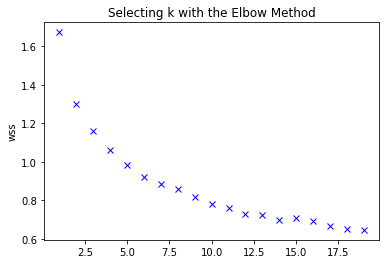

In [12]:
#plt.plot(K,wss)
plt.plot(K,wss,"bx")
plt.xlabel=("k_range")
plt.ylabel("wss")
plt.title("Selecting k with the Elbow Method")

plt.show()

- Decreases in wss number after  8
- cluster is minmial at 8 and becomes Flatness at 13
- Cluster Profiling :How many Cluster to be created (8,9,10....13)

## Cluster Profiling
- it Explains whcih cluster will gives more Meaningfull information(Highest Value is taken)

**cluster profile works only --cluster profile.py save in same workong location**

In [13]:
import cluster_profiles as cluster_profiles

## cluster profiling for k=8

- For cluster profiling we use the UNSCALED DATA (data_num)
- zprofile used to get profile
- Zprofile output gives Z values

In [14]:
kmeans=cluster.KMeans(n_clusters=8,random_state=200).fit(scaled_data)
cluster_profiles.get_zprofiles(data=numeric_data.copy(),kmeans=kmeans)

,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,6.532184,1.281713,2.697215,3.763440,151
1,-0.533242,-0.283190,-1.007730,-0.769869,4318
2,0.286600,2.131736,1.041321,1.033369,1075
3,-0.251766,0.803417,0.142785,0.058131,4184
4,-0.491532,-1.570758,-1.204206,-1.068536,2465
5,0.682058,0.359309,0.764040,1.032956,3007
6,-0.185013,-0.494153,0.230790,-0.210886,5476
7,2.385575,0.932359,1.744246,2.224733,937


- There are 8 cluster created Above,this op is called Zscore Outputs
- In cluster 1
- price=0.644891(Zvalue):price is 0.64 std dev above the average mean in cluster 1
- In cluster 3
- price =2.285528 (Zvalue) :It is above global Means 
- In cluster 2
- bedrooms=-0.280571(zvalue) :It is below the global Means
- In cluster 4 --Very Expansive apartment
- All varaibles are also High,nd the zvalue is also very high form global Means

-Global means =mean nd avg values of the variables

## Cluster profile =13 (Its not good model fitiing)

In [15]:
kmeans=cluster.KMeans(n_clusters=13,random_state=200).fit(scaled_data)
cluster_profiles.get_zprofiles(data=numeric_data.copy(),kmeans=kmeans)

,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,3.503900,0.922545,1.765171,2.422828,485
1,-0.597331,-0.311274,-1.375996,-0.911426,2213
2,0.350107,-0.478544,0.391600,0.476335,1859
3,1.013074,1.209825,1.976126,1.979764,887
4,0.063657,2.047477,0.704474,0.720794,1025
5,-0.164593,0.678214,0.555820,0.335071,3082
6,-0.515859,-1.577992,-1.275344,-1.111446,2273
7,1.122176,0.516434,0.627291,1.141330,1599
8,-0.340593,-0.491439,-0.435289,-0.492950,3456


## Finding the cluster size/ Optimal number using :Silhouette Measure

*** Data segmentaion  using silhouette Measure(its not Recomended/not used Regularly) ***

In [16]:
import sklearn.metrics as metrics
labels=cluster.KMeans(n_clusters=8,random_state=200).fit(scaled_data).labels_

In [17]:
metrics.silhouette_score(scaled_data,labels,metric="euclidean",sample_size=10000,random_state=200)

0.2835292946671927

- For  8 cluster model the silhouette score is 0.258

- Silhouette score near to -1 or Zero : Not optimal cluster
- Silhouette score near to +1         :Optimal cluster  (Closer +1 are good cluster)

In [18]:
#Checking cluster size from 7 to 13 
for i in range(7,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(scaled_data).labels_
    print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(scaled_data,labels,metric="euclidean",
                                 sample_size=1000,random_state=200)))

Silhoutte score for k= 7 is 0.27749569568576365
Silhoutte score for k= 8 is 0.2876565619801347
Silhoutte score for k= 9 is 0.2827955568043907
Silhoutte score for k= 10 is 0.2795895054563025
Silhoutte score for k= 11 is 0.2851598005065985
Silhoutte score for k= 12 is 0.2796213359680435


- Silhoutte score  K=8 is having high value ,so cluster profile is done for 8 cluster
- Model fitting is done for cluster =8 ..